<a href="https://colab.research.google.com/github/naot97/Learn-Opencv/blob/master/Matching_image_by_Correlation_coefficient.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import library

In [0]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow


# Read source image and temple image 

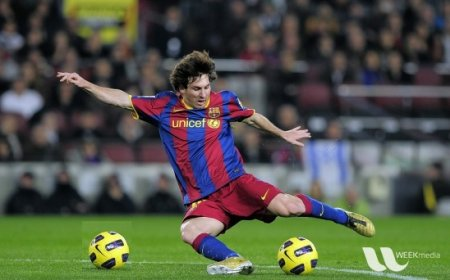

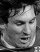

In [53]:
img = cv.imread('messi.jpg',0)
img_rgb = cv.imread('messi.jpg',1)

cv2_imshow(img_rgb)

temple = cv.imread('messi_face.jpg',0)
cv2_imshow(temple)


# Find location of temple

52 40 280 450


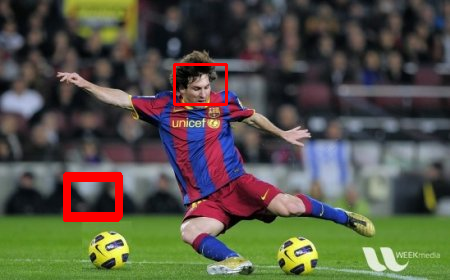

In [56]:
h_t,w_t = temple.shape
h_i,w_i = img.shape
print(h_t,w_t,h_i,w_i)

temple_hat = temple - temple.mean()

result = np.zeros((h_i-h_t, w_i-w_t))
for i in range(h_i-h_t):
  for j in range(w_i-w_t):

    win = img[i: i + h_t,j: j + w_t]
    win_hat = win - win.mean()

    s = (temple_hat * win_hat).sum()
    mau = np.sqrt((temple_hat**2).sum() * (win_hat**2).sum())
    s_norm = s / mau  

    result[i,j] = s_norm

#cv2_imshow(result)
min_val, max_val, min_loc, max_loc = cv.minMaxLoc(result)


#x,y = max_loc
#print(x,y,max_val,v)
#cv2_imshow(img[x:x + h_t, y:y + w_t])

threshold = 0.55
img_rgb 

loc = np.where( result >= threshold)
for pt in zip(*loc[::-1]):
    cv.rectangle(img_rgb, pt, (pt[0] + h_t, pt[1] + w_t), (0,0,255), 2)
    cv2_imshow(img_rgb)
    break